## 6.5 Machine Learning Part 2

### This script contains the following:

#### 01. Import Libraries
#### 02. Import Data
#### 03. The Elbow Technique
#### 04. k-means Clustering

# 01. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

# 02. Importing Data

In [3]:
# Define path
path = r'C:\Users\tom\OneDrive\Documents\CareerFoundry - Data Analytics Course\Data Immersion\Tasks\Achievement 6\European Football Analysis'

In [4]:
# Import dataframe
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', '2021-2022 Big 5 European Football Leagues CLEAN.csv'))

In [5]:
df.shape

(2921, 40)

In [6]:
df.head()

,Player,Nation,Position,Team,Competition,Age,Born,Matches Played,Starts,Minutes Played,...,G+A-PK90,xG,npxG,xA,npxG+xA,xG90,xA90,xG+xA90,npxG90,npxG+xA90
0,Aaron Connolly,Ireland,Forward,Brighton,Premier League,21,2000,4,1,156,...,0.00,0.5,0.5,0.4,0.8,0.26,0.20,0.47,0.26,0.47
1,Aaron Cresswell,England,Defender,West Ham,Premier League,31,1989,31,31,2726,...,0.17,1.1,1.1,3.2,4.3,0.04,0.11,0.14,0.04,0.14
2,Aarón Escandell,Spain,Goalkeeper,Granada,La Liga,25,1995,4,3,284,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
3,Aaron Hickey,Scotland,Defender,Bologna,Serie A,19,2002,36,34,2820,...,0.19,1.1,1.1,1.4,2.5,0.04,0.04,0.08,0.04,0.08
4,Aaron Lennon,England,Midfielder,Burnley,Premier League,34,1987,28,17,1551,...,0.12,1.1,1.1,0.5,1.6,0.06,0.03,0.09,0.06,0.09


In [7]:
# Drop Columns
df_football = df.drop(columns =['Player', 'Nation', 'Position', 'Team', 'Competition'])

# 03. The Elbow Technique

In [8]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [9]:
score = [kmeans[i].fit(df_football).score(df_football) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-2797674906.465326,
 -680721382.3735837,
 -295322755.78695744,
 -164717118.6372177,
 -105867058.07228073,
 -75863129.90033998,
 -55118731.16401989,
 -42986082.80326156,
 -34115809.268736914]

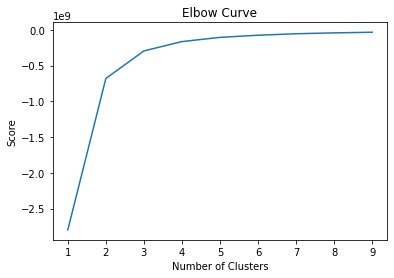

In [11]:
# Plot the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

There is a large jump from two to three on the x-axis, but after this the curve straightens out. Therefore, the optimal count for clusters is three.

# 04. k-means Clustering

In [13]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 3) 

In [15]:
# Fit the k-means object to the data.
kmeans.fit(df_football)

KMeans(n_clusters=3)

In [16]:
df_football['clusters'] = kmeans.fit_predict(df_football)

In [17]:
df_football.head()

,Age,Born,Matches Played,Starts,Minutes Played,90s Played,Goals,Assists,Non-Penalty Goals,Penalty Goals,...,xG,npxG,xA,npxG+xA,xG90,xA90,xG+xA90,npxG90,npxG+xA90,clusters
0,21,2000,4,1,156,1.7,0,0,0,0,...,0.5,0.5,0.4,0.8,0.26,0.20,0.47,0.26,0.47,0
1,31,1989,31,31,2726,30.3,2,3,2,0,...,1.1,1.1,3.2,4.3,0.04,0.11,0.14,0.04,0.14,1
2,25,1995,4,3,284,3.2,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0
3,19,2002,36,34,2820,31.3,5,1,5,0,...,1.1,1.1,1.4,2.5,0.04,0.04,0.08,0.04,0.08,1
4,34,1987,28,17,1551,17.2,2,0,2,0,...,1.1,1.1,0.5,1.6,0.06,0.03,0.09,0.06,0.09,2


In [18]:
df_football['clusters'].value_counts()

0    1238
2     936
1     747
Name: clusters, dtype: int64

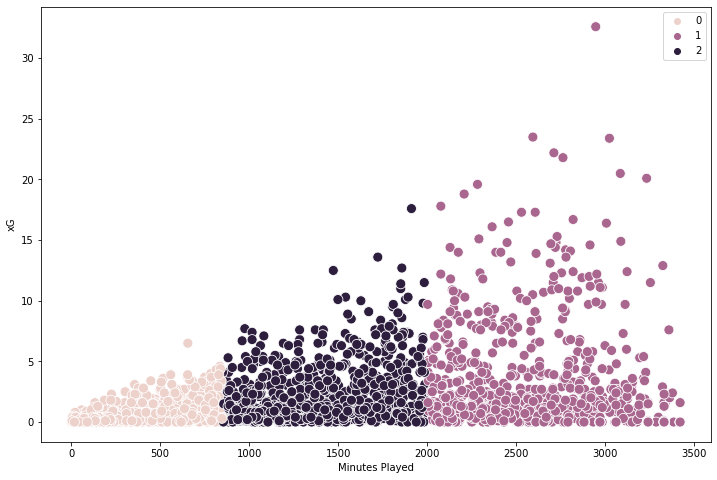

In [21]:
# Plot the clusters for the "Minutes Played" and "xG" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_football['Minutes Played'], y=df_football['xG'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Minutes Played') # Label x-axis.
plt.ylabel('xG') # Label y-axis.
plt.show()

The clusters seem to indicate the number of minutes played. Low minutes (0 - 900), Medium minutes (900 - 2000) and High minutes (2000 +). As such, the average xG also increases through the groups.

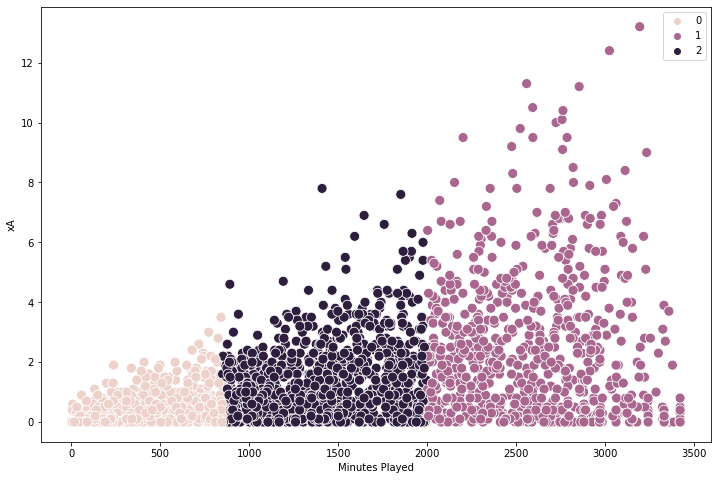

In [23]:
# Plot the clusters for the "Mnutes Played" and "xA" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_football['Minutes Played'], y=df_football['xA'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Minutes Played') 
plt.ylabel('xA') 
plt.show()

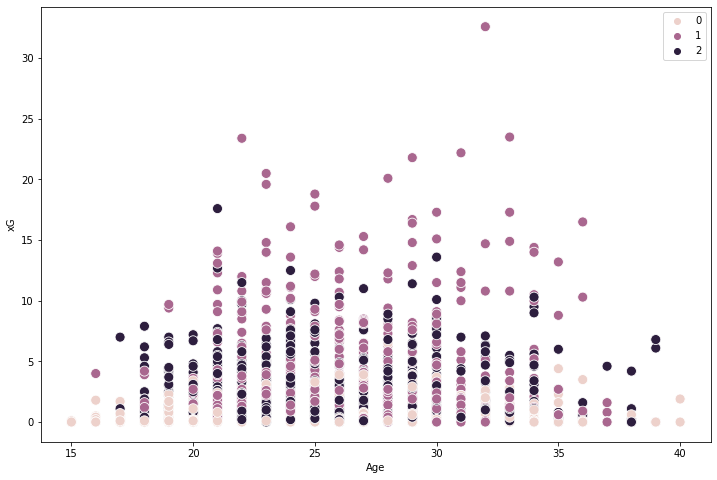

In [24]:
# Plot the clusters for the "Age" and "xG" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_football['Age'], y=df_football['xG'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Age') 
plt.ylabel('xG') 
plt.show()

There does not appear to be any sense made from looking at age and xG.

In [26]:
df_football.loc[df_football['clusters'] == 2, 'cluster'] = 'dark purple'
df_football.loc[df_football['clusters'] == 1, 'cluster'] = 'purple'
df_football.loc[df_football['clusters'] == 0, 'cluster'] = 'pink'

In [27]:
df_football.groupby('cluster').agg({'Minutes Played':['mean', 'median'], 
                         'Age':['mean', 'median'], 
                         'xG':['mean', 'median'],
                         'npxG':['mean', 'median'],
                          'xA':['mean', 'median']})

Minutes Played                Age               xG         \
                      mean  median       mean median      mean median   
cluster                                                                 
dark purple    1412.380342  1413.5  25.864316   26.0  2.060363    1.1   
pink            287.016155   206.5  24.004039   23.0  0.421486    0.1   
purple         2583.771084  2563.0  26.491299   26.0  3.408835    1.7   

                 npxG               xA         
                 mean median      mean median  
cluster                                        
dark purple  1.916132    1.1  1.405662    1.1  
pink         0.404847    0.1  0.261066    0.0  
purple       3.020482    1.7  2.282329    1.6

By finding patterns in the data through these results, we are able to identify groups of players who may be under or overperforming. This will allow for further analysis down the line whereby these groups of under/overperforming players can be analysed to try and identify why what may cause their performances.